# Práctica 1

In [5]:
# Librerías
# Nota: puedes importar cualquier otra librería que necesites usar

import numpy as np
from scipy import stats
from plotly.subplots import make_subplots
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
# Leer dataset

data = pd.read_csv('/Users/universidad/Desktop/Universidad/CURSO-2023-2024/BIO/PRACTICAS/P1/datasets/sourth_africa_chd.csv')

In [7]:
# Visualizar los primeros elementos del dataset

data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si


In [8]:
# Forma del dataset

data.shape

(462, 10)

In [9]:
# Visualizar un cojunto de elementos del dataset cualquiera

data.iloc[100:106,:]

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
100,136,8.00,7.85,23.81,Present,51,22.69,2.78,50,No
101,166,0.07,4.03,29.29,Absent,53,28.37,0.00,27,No
102,118,0.00,4.34,30.12,Present,52,32.18,3.91,46,No
103,128,0.42,4.60,26.68,Absent,41,30.97,10.33,31,No
104,118,1.50,5.38,25.84,Absent,64,28.63,3.89,29,No
105,158,3.60,2.97,30.11,Absent,63,26.64,108.00,64,No


In [10]:
# Selección de variables numéricas y categóricas

list_var_num = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']
list_var_cat = ['famhist','chd']

var_num = data[list_var_num]
var_cat = data[list_var_cat]

In [11]:
var_num.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,49,25.30,97.20,52
1,144,0.01,4.41,28.61,55,28.87,2.06,63
2,118,0.08,3.48,32.28,52,29.14,3.81,46
3,170,7.50,6.41,38.03,51,31.99,24.26,58
4,134,13.60,3.50,27.78,60,25.99,57.34,49


In [12]:
var_cat.head()

,famhist,chd
0,Present,Si
1,Absent,Si
2,Present,No
3,Present,Si
4,Present,Si


### 1) Análisis univariante no gráfico

#### Categóricas

In [13]:
# Tabla de conteo, proporción y procentaje

## variable famhist

count = var_cat['famhist'].value_counts()
proportion = count/var_cat['famhist'].count()
percent = proportion*100

table = pd.DataFrame({'count':count, 
                      'proportion':proportion,
                      'percent':percent}).transpose()

table['Total'] = table.sum(axis=1)

table

famhist,Absent,Present,Total
count,270.000000,192.000000,462.0
proportion,0.584416,0.415584,1.0
percent,58.441558,41.558442,100.0


In [14]:
# Realiza la tabla de conteo, proporción y procentaje para la variable categórica chd

count = var_cat['chd'].value_counts()
proportion = count/var_cat['chd'].count()
percent = proportion*100

table = pd.DataFrame({'count':count, 
                      'proportion':proportion,
                      'percent':percent}).transpose()

table['Total'] = table.sum(axis=1)

table

chd,No,Si,Total
count,302.000000,160.000000,462.0
proportion,0.653680,0.346320,1.0
percent,65.367965,34.632035,100.0


#### Numéricas

In [15]:
# Calcula, para una variable numérica que elijas, la tendencia central (media, mediana y moda) 
# y la dispersión (varianza y desviación estándar)


# list_var_num = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']
# var_num = data[list_var_num]

# calculate mean
tobacco_mean = np.mean(var_num['tobacco'])

# calculate median
tobacco_median = np.median(var_num['tobacco'])

# calculate mode
tobacco_mode = statistics.mode(var_num['tobacco'])

print(tobacco_mean, tobacco_median, tobacco_mode)

3.635649350649351 2.0 0.0


### 2) Análisis univariante gráfico

#### Categóricas

In [16]:
# Crea un bar chart para una variable categórica que elijas

fig = px.bar(var_cat['chd'], x='chd', labels={'chd': 'Respuestas'})

fig.show()

#### Numéricas

In [17]:
# Crea un histograma y un boxplot para una variable numérica que elijas

fig_hist = px.histogram(var_num['tobacco'])
fig_box = px.box(var_num['tobacco'])

fig_subplots = make_subplots(rows=1, cols=2, subplot_titles=['Histograma', 'Diagrama de Cajas'])
fig_subplots.add_trace(fig_hist['data'][0], row=1, col=1)
fig_subplots.add_trace(fig_box['data'][0], row=1, col=2)

# Mostrar el gráfico combinado
fig_subplots.show()

### 3) Análisis multivariante no gráfico

#### Categóricas

In [18]:
# Calcula una tabla cruzada para las variables categóricas del dataset

tabla_cruzada = pd.crosstab(index=var_cat['famhist'], columns=var_cat['chd'], margins=True, margins_name='Total')

tabla_cruzada

chd,No,Si,Total
famhist,,,
Absent,206,64,270
Present,96,96,192
Total,302,160,462


#### Numéricas

In [24]:
# Calcula la tabla de covarianzas y correlaciones para las variables numéricas del dataset

cov_matrix = var_num.cov()

corr_matrix = var_num.corr()

cov_matrix



,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
sbp,420.099018,19.980904,6.719048,56.853088,-11.561146,20.560605,70.295979,116.409504
tobacco,19.980904,21.095870,1.511467,10.243648,-0.658701,2.410084,22.579878,30.216833
ldl,6.719048,1.511467,4.288665,7.096730,0.895541,2.884043,-1.693487,9.433118
adiposity,56.853088,10.243648,7.096730,60.539271,-3.295625,23.492566,19.110856,71.150916
typea,-11.561146,-0.658701,0.895541,-3.295625,96.383976,3.061481,9.493078,-14.716201
obesity,20.560605,2.410084,2.884043,23.492566,3.061481,17.755101,5.324835,17.961062
alcohol,70.295979,22.579878,-1.693487,19.110856,9.493078,5.324835,599.322235,36.166493
age,116.409504,30.216833,9.433118,71.150916,-14.716201,17.961062,36.166493,213.421608


### 4) Análisis multivariante gráfico

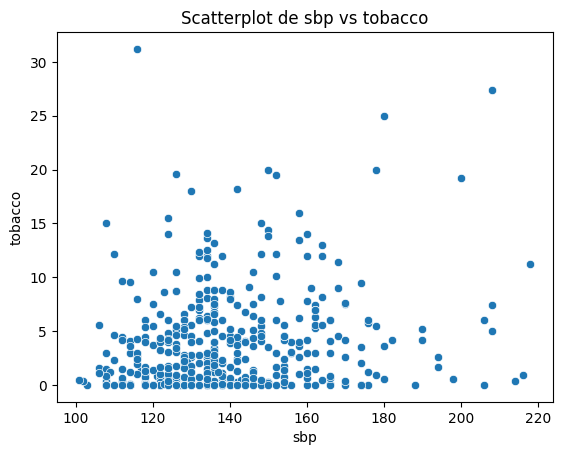

In [25]:
# Crea un scatterplot de dos variables numéricas del dataset

# list_var_num = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']

variable1 = 'sbp'
variable2 = 'tobacco'

sns.scatterplot(data=var_num, x=variable1, y=variable2)
plt.title(f'Scatterplot de {variable1} vs {variable2}')
plt.show()

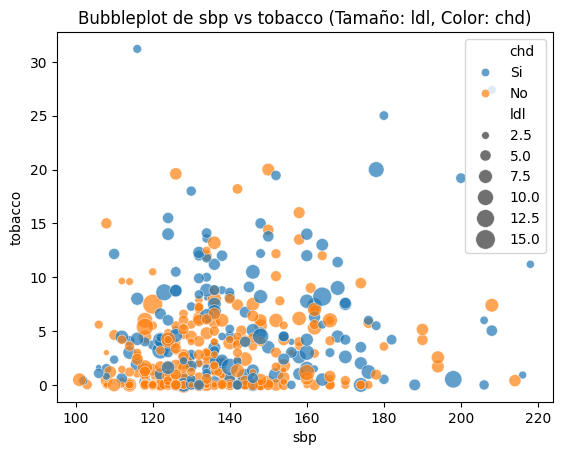

In [27]:
# EXTRA: Crea un bubbleplot de dos o tres variables numéricas y una categórica del dataset

x_variable = 'sbp'
y_variable = 'tobacco'
size_variable = 'ldl'
hue_variable = 'chd' 

# Seaborn
sns.scatterplot(
    data=data,
    x=x_variable,
    y=y_variable,
    size=size_variable,
    hue=hue_variable,
    sizes=(10, 200),
    alpha=0.7
)

plt.title(f'Bubbleplot de {x_variable} vs {y_variable} (Tamaño: {size_variable}, Color: {hue_variable})')
plt.show()
